In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()

In [3]:
chembl = pd.read_csv("data/ChEMBL_CYP1A2_activities.csv", sep=";")

In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL4063079,NaN,NaN,314.34,0.0,3.31,10,COc1ccc(O)c(C(=O)/C=C/c2ccc(OC)c(OC)c2)c1,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,60.0
1,CHEMBL4098711,NaN,NaN,374.39,0.0,3.33,13,COc1cc(O)c(C(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)cc1OC,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,-3.1
2,CHEMBL4071093,NaN,NaN,314.34,0.0,3.31,4,COc1cccc(/C=C/C(=O)c2cc(OC)c(OC)cc2O)c1,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,98.0
3,CHEMBL402794,BIS(2-ETHYLHEXYL)PHTHALATE,NaN,390.56,1.0,6.43,BIS(2-ETHYLHEXYL)PHTHALATE,CCCC[C@@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)...,IC50,NaN,...,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,NaN
4,CHEMBL150999,NaN,NaN,216.28,0.0,3.26,12,CCCCOc1ccc(-c2ncc[nH]2)cc1,IC50,'=',...,CHEMBL1145921,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,25500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26768,CHEMBL4798829,NaN,NaN,415.52,1.0,5.21,37; BAY-179,c1ccc2oc(-c3csc(C4CCN(Cc5nc6ncccc6[nH]5)CC4)n3...,IC50,'>',...,CHEMBL5046307,1,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,20.0
26769,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,alpha-Naphthoflavone,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,Inhibition,'=',...,CHEMBL5329208,1,Scientific Literature,RSC Med Chem,2023.0,NaN,DOSE = 10.0 microM | TIME = 0.1667 hr,INHIBITOR,NaN,88.7
26770,CHEMBL4802045,BAY-091,NaN,440.48,1.0,5.56,60; BAY-091,CC[C@@H](Nc1c(C#N)c(-c2ccc(-c3cccc(C)c3F)cc2)n...,IC50,'>',...,CHEMBL5241108,1,Scientific Literature,J Med Chem,2021.0,NaN,NaN,NaN,NaN,20.0
26771,CHEMBL288441,BOSUTINIB,4.0,530.46,2.0,5.19,3,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,IC50,NaN,...,CHEMBL5370690,1,Scientific Literature,ACS Med Chem Lett,2023.0,NaN,TIME = 0.08333 hr,NaN,NaN,NaN


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            158
Potential transcription error      1
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR    511
SUBSTRATE      8
ACTIVATOR      4
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM              14198
%                2625
uM                244
hr                 12
pmol/min           11
microM/min         11
min-1              10
uL/min              9
nmol/min            9
/min                8
10'-4/min           5
/min/microM         2
pmol/hr             2
ug.mL-1             2
mL.min-1.g-1        2
ug/L                2
mM                  1
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
IC50                           5279
Inhibition                     2265
Ki                              928
Activity                        527
INH                             217
Drug metabolism                 121
TDI                              83
EC50                             31
Compound recovery                24
Ratio IC50                       20
Stability                        17
Kinact                           14
FC                               14
Km                               13
T1/2                             12
CL                               11
Inhibitory potential             10
Vmax                              9
IC90                              8
mechanism based inhibition        8
Emax                              3
Kcat/Km                           3
Kcat                              3
NOAEL                             3
Control of P-450 marker           2
IC5                               1
pIC50         

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

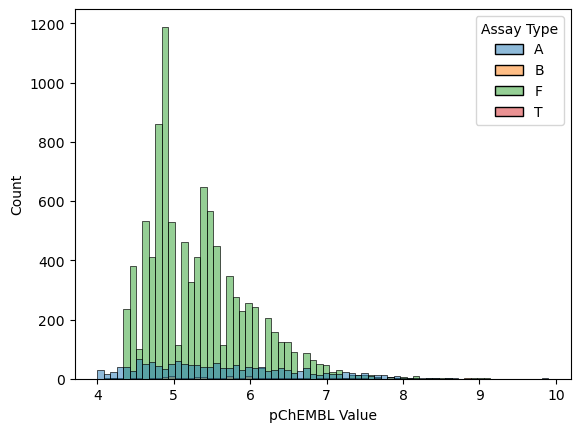

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")


<Axes: xlabel='Action Type', ylabel='count'>

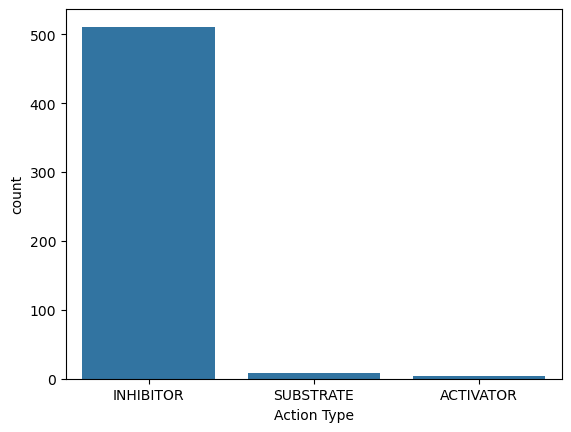

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
chembl["Molecule ChEMBL ID"].nunique()

23751

In [13]:
chembl["Assay ChEMBL ID"].nunique()

2322

In [14]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid
from utils.utils import standardize_smiles

In [15]:
with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|██████████| 26773/26773 [03:40<00:00, 121.34it/s]


In [16]:
from utils.utils import smi_to_inchikey
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████| 26773/26773 [00:05<00:00, 4572.26it/s]


In [17]:
substrates = chembl[chembl["Action Type"] == "SUBSTRATE"]

In [22]:
substrates.INCHIKEY.nunique()

8

In [23]:
len(substrates.INCHIKEY)

8

In [24]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "Molecule Name", "Action Type"]
clean_active = substrates[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_31963/2231850761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [25]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type
1804,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,CAFFEINE,SUBSTRATE
9770,Cc1[nH]cnc1CN1CCc2c(c3ccccc3n2C)C1=O,JSWZEAMFRNKZNL-UHFFFAOYSA-N,ALOSETRON,SUBSTRATE
16771,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,THEOPHYLLINE,SUBSTRATE
21968,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,DULOXETINE,SUBSTRATE
21969,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,PHENACETIN,SUBSTRATE


In [26]:
clean_deduped["action_type"].value_counts()

action_type
SUBSTRATE    8
Name: count, dtype: int64

In [27]:
clean_deduped["action_type"] = "substrate"

In [28]:
clean_deduped["action_type"].value_counts()

action_type
substrate    8
Name: count, dtype: int64

In [29]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

In [31]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)